In [1]:
import jax 
import jax.numpy as jnp
import numpy as np

import sys

import numpy


In [2]:
import hoomd
import hoomd.md

import numpy


pi = numpy.pi
kT = 0.596161
dt = 0.02045
mode = "--mode=gpu"


def generate_context(kT = kT, dt = dt, mode = mode):
    """
    Generates a simulation context, we pass this function to the attribute
    `run` of our sampling method.
    """
    hoomd.context.initialize(mode)

    ### System Definition
    snapshot = hoomd.data.make_snapshot(
        N = 14,
        box = hoomd.data.boxdim(Lx = 41, Ly = 41, Lz = 41),
        particle_types = ['C', 'H'],
        bond_types = ["CC", "CH"],
        angle_types = ["CCC", "CCH", "HCH"],
        dihedral_types = ["CCCC", "HCCC", "HCCH"],
        pair_types = ["CCCC", "HCCC", "HCCH"],
        dtype = "double"
    )

    snapshot.particles.typeid[0] = 0
    snapshot.particles.typeid[1:4] = 1
    snapshot.particles.typeid[4] = 0
    snapshot.particles.typeid[5:7] = 1
    snapshot.particles.typeid[7] = 0
    snapshot.particles.typeid[8:10] = 1
    snapshot.particles.typeid[10] = 0
    snapshot.particles.typeid[11:14] = 1

    positions = numpy.array([
        [-2.990196,  0.097881,  0.000091],
        [-2.634894, -0.911406,  0.001002],
        [-2.632173,  0.601251, -0.873601],
        [-4.060195,  0.099327, -0.000736],
        [-2.476854,  0.823942,  1.257436],
        [-2.832157,  1.833228,  1.256526],
        [-2.834877,  0.320572,  2.131128],
        [-0.936856,  0.821861,  1.258628],
        [-0.578833,  1.325231,  0.384935],
        [-0.581553, -0.187426,  1.259538],
        [-0.423514,  1.547922,  2.515972],
        [-0.781537,  1.044552,  3.389664],
        [ 0.646485,  1.546476,  2.516800],
        [-0.778816,  2.557208,  2.515062]
    ])

    reference_box_low_coords = numpy.array([-22.206855, -19.677099, -19.241968])
    box_low_coords = numpy.array([
        -snapshot.box.Lx / 2,
        -snapshot.box.Ly / 2,
        -snapshot.box.Lz / 2
    ])
    positions += (box_low_coords - reference_box_low_coords)

    snapshot.particles.position[:] = positions[:]

    mC = 12.00
    mH = 1.008
    snapshot.particles.mass[:] = [
        mC, mH, mH, mH,
        mC, mH, mH,
        mC, mH, mH,
        mC, mH, mH, mH
    ]

    reference_charges = numpy.array([
        -0.180000, 0.060000, 0.060000, 0.060000,
        -0.120000, 0.060000, 0.060000,
        -0.120000, 0.060000, 0.060000,
        -0.180000, 0.060000, 0.060000, 0.060000]
    )
    charge_conversion = 18.22262
    snapshot.particles.charge[:] = charge_conversion * reference_charges[:]

    snapshot.bonds.resize(13)
    snapshot.bonds.typeid[0:3] = 1
    snapshot.bonds.typeid[3] = 0
    snapshot.bonds.typeid[4:6] = 1
    snapshot.bonds.typeid[6] = 0
    snapshot.bonds.typeid[7:9] = 1
    snapshot.bonds.typeid[9] = 0
    snapshot.bonds.typeid[10:13] = 1

    snapshot.bonds.group[:] = [
        [0, 2], [0, 1], [0, 3], [0, 4],
        [4, 5], [4, 6], [4, 7],
        [7, 8], [7, 9], [7, 10],
        [10, 11], [10, 12], [10, 13]
    ]

    snapshot.angles.resize(24)
    snapshot.angles.typeid[0:2] = 2
    snapshot.angles.typeid[2] = 1
    snapshot.angles.typeid[3] = 2
    snapshot.angles.typeid[4:8] = 1
    snapshot.angles.typeid[8] = 0
    snapshot.angles.typeid[9] = 2
    snapshot.angles.typeid[10:14] = 1
    snapshot.angles.typeid[14] = 0
    snapshot.angles.typeid[15] = 2
    snapshot.angles.typeid[16:21] = 1
    snapshot.angles.typeid[21:24] = 2

    snapshot.angles.group[:] = [
        [1, 0, 2], [2, 0, 3], [2, 0, 4],
        [1, 0, 3], [1, 0, 4], [3, 0, 4],
        [0, 4, 5], [0, 4, 6], [0, 4, 7],
        [5, 4, 6], [5, 4, 7], [6, 4, 7],
        [4, 7, 8], [4, 7, 9], [4, 7, 10],
        [8, 7, 9], [8, 7, 10], [9, 7, 10],
        [7, 10, 11], [7, 10, 12], [7, 10, 13],
        [11, 10, 12], [11, 10, 13], [12, 10, 13]
    ]

    snapshot.dihedrals.resize(27)
    snapshot.dihedrals.typeid[0:2] = 2
    snapshot.dihedrals.typeid[2] = 1
    snapshot.dihedrals.typeid[3:5] = 2
    snapshot.dihedrals.typeid[5] = 1
    snapshot.dihedrals.typeid[6:8] = 2
    snapshot.dihedrals.typeid[8:11] = 1
    snapshot.dihedrals.typeid[11] = 0
    snapshot.dihedrals.typeid[12:14] = 2
    snapshot.dihedrals.typeid[14] = 1
    snapshot.dihedrals.typeid[15:17] = 2
    snapshot.dihedrals.typeid[17:21] = 1
    snapshot.dihedrals.typeid[21:27] = 2

    snapshot.dihedrals.group[:] = [
        [2, 0, 4, 5], [2, 0, 4, 6], [2, 0, 4, 7],
        [1, 0, 4, 5], [1, 0, 4, 6], [1, 0, 4, 7],
        [3, 0, 4, 5], [3, 0, 4, 6], [3, 0, 4, 7],
        [0, 4, 7, 8], [0, 4, 7, 9], [0, 4, 7, 10],
        [5, 4, 7, 8], [5, 4, 7, 9], [5, 4, 7, 10],
        [6, 4, 7, 8], [6, 4, 7, 9], [6, 4, 7, 10],
        [4, 7, 10, 11], [4, 7, 10, 12], [4, 7, 10, 13],
        [8, 7, 10, 11], [8, 7, 10, 12], [8, 7, 10, 13],
        [9, 7, 10, 11], [9, 7, 10, 12], [9, 7, 10, 13]
    ]

    snapshot.pairs.resize(27)
    snapshot.pairs.typeid[0:1] = 0
    snapshot.pairs.typeid[1:11] = 1
    snapshot.pairs.typeid[11:27] = 2
    snapshot.pairs.group[:] = [
        # CCCC
        [0, 10],
        # HCCC
        [0, 8], [0, 9], [5, 10], [6, 10],
        [1, 7], [2, 7], [3, 7],
        [11, 4], [12, 4], [13, 4],
        # HCCH
        [1, 5], [1, 6], [2, 5], [2, 6], [3, 5], [3, 6],
        [5, 8], [6, 8], [5, 9], [6, 9],
        [8, 11], [8, 12], [8, 13], [9, 11], [9, 12], [9, 13]
    ]

    hoomd.init.read_snapshot(snapshot)

    ### Set interactions
    nl_ex = hoomd.md.nlist.cell()
    nl_ex.reset_exclusions(exclusions = ["1-2", "1-3", "1-4"])

    lj = hoomd.md.pair.lj(r_cut = 12.0, nlist = nl_ex)
    lj.pair_coeff.set('C', 'C', epsilon = 0.07, sigma = 3.55)
    lj.pair_coeff.set('H', 'H', epsilon = 0.03, sigma = 2.42)
    lj.pair_coeff.set('C', 'H', epsilon = numpy.sqrt(0.07*0.03), sigma = numpy.sqrt(3.55*2.42))

    coulomb = hoomd.md.charge.pppm(hoomd.group.charged(), nlist = nl_ex)
    coulomb.set_params(Nx = 64, Ny = 64, Nz = 64, order = 6, rcut = 12.0)

    harmonic = hoomd.md.bond.harmonic()
    harmonic.bond_coeff.set("CC", k = 2*268.0, r0 = 1.529)
    harmonic.bond_coeff.set("CH", k = 2*340.0, r0 = 1.09)

    angle = hoomd.md.angle.harmonic()
    angle.angle_coeff.set("CCC", k = 2*58.35, t0 = 112.7 * pi / 180)
    angle.angle_coeff.set("CCH", k = 2*37.5, t0 = 110.7 * pi / 180)
    angle.angle_coeff.set("HCH", k = 2*33.0, t0 = 107.8 * pi / 180)


    dihedral = hoomd.md.dihedral.opls()
    dihedral.dihedral_coeff.set("CCCC", k1 = 1.3, k2 = -0.05, k3 = 0.2, k4 = 0.0)
    dihedral.dihedral_coeff.set("HCCC", k1 = 0.0, k2 = 0.0, k3 = 0.3, k4 = 0.0)
    dihedral.dihedral_coeff.set("HCCH", k1 = 0.0, k2 = 0.0, k3 = 0.3, k4 = 0.0)

    lj_special_pairs = hoomd.md.special_pair.lj()
    lj_special_pairs.pair_coeff.set("CCCC", epsilon = 0.07, sigma = 3.55, r_cut = 12.0)
    lj_special_pairs.pair_coeff.set("HCCH", epsilon = 0.03, sigma = 2.42, r_cut = 12.0)
    lj_special_pairs.pair_coeff.set("HCCC",
        epsilon = numpy.sqrt(0.07 * 0.03), sigma = numpy.sqrt(3.55 * 2.42), r_cut = 12.0
    )

    coulomb_special_pairs = hoomd.md.special_pair.coulomb()
    coulomb_special_pairs.pair_coeff.set("CCCC", alpha = 0.5, r_cut = 12.0)
    coulomb_special_pairs.pair_coeff.set("HCCC", alpha = 0.5, r_cut = 12.0)
    coulomb_special_pairs.pair_coeff.set("HCCH", alpha = 0.5, r_cut = 12.0)

    hoomd.md.integrate.mode_standard(dt = dt)
    integrator = hoomd.md.integrate.nvt(group = hoomd.group.all(), kT = kT, tau = 100*dt)
    integrator.randomize_velocities(seed = 42)

    return hoomd.context.current

In [3]:
from pysages.grids import Grid
from pysages.colvars import DihedralAngle
from pysages.methods import HarmonicBias, HistogramLogger

import pysages

In [4]:
cvs = [DihedralAngle([0, 4, 7, 10])]
k = 15

center_cv = [1.1]

topology = (14,)
method = HarmonicBias(cvs, k, center_cv)

In [5]:
callback = HistogramLogger(100)
run_result = pysages.run(method, generate_context, int(5e4), callback, profile=True)

HOOMD-blue 2.9.7 CUDA (11.4) DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 SSE4_1 SSE4_2 AVX AVX2 
Compiled: 08/31/2023
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, J Glaser, and S C Glotzer. "HOOMD-blue: A Python package for
  high-performance molecular dynamics and hard particle Monte Carlo
  simulations", Computational Materials Science 173 (2020) 109363
-----
HOOMD-blue is running on the following GPU(s):
 [0]NVIDIA GeForce GTX TITAN X  24 SM_5.2 @ 1.24 GHz, 12210 MiB DRAM


notice(2): Group "all" created containing 14 particles
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 7 exclusions             : 6
notice(2): Particles with 10 exclusions             : 6
notice(2): Particles with 13 exclusions             : 2
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
notice(2): Group "charged" created containing 14 particles
-----
You are using PPPM. Please cite the following:
* D N LeBard, B G Levine, S A Barr, A Jusufi, S Sanders, M L Klein, and A Z
  Panagiotopoulos. "Self-assembly of coarse-grained ionic surfactants
  accelerated by graphics processing units", Journal of Computational Physics 8
  (2012) 2385-2397
-----
** starting run **
notice(2): charge.pppm: RMS error: 1.29239e-08
Time 00:00:11 | Step 3198 / 50000 | TPS 319.749 | ETA 00:02:26
Time 00:00:21 | Step 7129 / 50000 | TPS 393.091 | ETA 00:01:49
Time 00:00:31 | Step 11097 / 50000 | TPS 396.761 | ETA 00:

In [7]:
import matplotlib.pyplot as plt
def get_target_dist(center, k, lim, bins):
    x = np.linspace(lim[0], lim[1], bins)
    p = np.exp(-0.5 * k * (x - center)**2)
    # norm numerically
    p *= (lim[1] - lim[0]) / np.sum(p)
    return p
    

In [8]:
Lmax = 6.0
bins = 25
target_hist = []
for i in range(len(center_cv)):
    target_hist.append(
        get_target_dist(center_cv[i], k, (-Lmax / 2, Lmax / 2), bins)
    )
lims = [(-Lmax / 2, Lmax / 2)]
hist, edges = callback.get_histograms(bins=bins, range=lims)
print(hist.shape)
hist_list = [
    hist / (Lmax ** 2),

]
lim = (-Lmax / 2, Lmax / 2)

(25,)


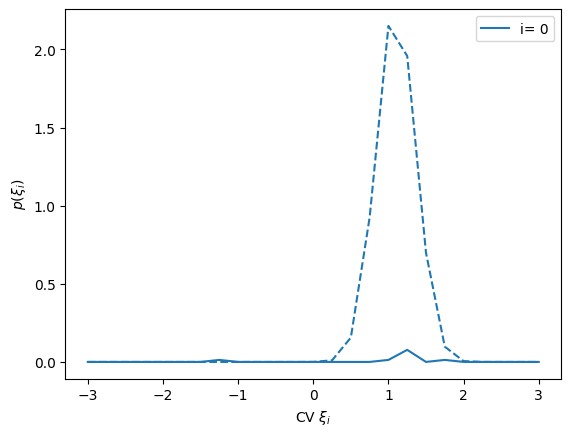

In [19]:
fig, ax = plt.subplots()

ax.set_xlabel(r"CV $\xi_i$")
ax.set_ylabel(r"$p(\xi_i)$")

x = np.linspace(lim[0], lim[1], hist_list[0].shape[0])

for i in range(len(hist_list)):
    (line,) = ax.plot(x, hist_list[i], label="i= {0}".format(i))
    ax.plot(x, target_hist[i], "--", color=line.get_color())

ax.legend(loc="best")
